**Problem Statement**: This notebook provides the details about Machine learning predictive model for the problem “Bank loan default risk”.

# **1. importing required libraries and reading the data**


In [1]:
# Code to mount google drive   (loading the data from your google drive)
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold      # for Feature selection
from sklearn.feature_selection import mutual_info_classif    # Feature selection - mutual information
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from sklearn.ensemble import IsolationForest



# **Reading data from pickle file**

In [3]:
import pickle
import joblib 
import pandas as pd

# joblib.dump(FinalXGboostModel, r'/gdrive/MyDrive/PGD_project/FinalXGboostModel.pkl') 
# model = joblib.load(r'/gdrive/MyDrive/PGD_project/FinalXGboostModel.pkl') 
# model.predict(X_test)

DataForML_t=pd.read_pickle(r'/gdrive/MyDrive/PGD_project/DataForML_t.pkl')

In [4]:
DataForML_t.head()

,TARGET,AGE,AMT_CREDIT,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,YEARS_EMPLOYED,AMT_ANNUITY,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,CODE_GENDER,FLAG_OWN_CAR,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,NAME_TYPE_SUITE,ORGANIZATION_TYPE
0,1,25.0,406597.5,202500.0,1.0,1.0,24700.5,1,0,1,1,0,2,2,0,0,0.262949,1,3648.0,2120,2,2.0,Male,N,Working,Single / not married,House / apartment,Secondary / secondary special,Cash loans,Y,Unaccompanied,Business Entity Type 3
1,0,45.0,1293502.5,270000.0,2.0,3.0,35698.5,1,0,1,1,0,1,1,0,0,0.622246,0,1186.0,291,1,0.0,Female,N,State servant,Married,House / apartment,Higher education,Cash loans,N,Family,School
2,0,52.0,135000.0,67500.0,1.0,0.0,6750.0,1,1,1,0,0,2,2,0,0,0.555912,0,4260.0,2531,0,0.0,Male,Y,Working,Single / not married,House / apartment,Secondary / secondary special,Revolving loans,Y,Unaccompanied,Government
3,0,52.0,312682.5,135000.0,2.0,8.0,29686.5,1,0,0,1,0,2,2,0,0,0.650442,0,9833.0,2437,2,0.0,Female,N,Working,Civil marriage,House / apartment,Secondary / secondary special,Cash loans,Y,Unaccompanied,Business Entity Type 3
4,0,54.0,513000.0,121500.0,1.0,8.0,21865.5,1,0,0,0,0,2,2,0,1,0.322738,0,4311.0,3458,0,0.0,Male,N,Working,Single / not married,House / apartment,Secondary / secondary special,Cash loans,Y,Unaccompanied,Religion


In [5]:
DataForML_t['CODE_GENDER'].replace({'Male':1, 'Female':0}, inplace=True)
DataForML_t['FLAG_OWN_CAR'].replace({'Y':1, 'N':0}, inplace=True)
DataForML_t['NAME_CONTRACT_TYPE'].replace({'Revolving loans':1, 'Cash loans':0}, inplace=True)
DataForML_t['FLAG_OWN_REALTY'].replace({'Y':1, 'N':0}, inplace=True)

In [6]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML_t)
DataForML_Numeric.head()

,TARGET,AGE,AMT_CREDIT,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,YEARS_EMPLOYED,AMT_ANNUITY,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,CODE_GENDER,FLAG_OWN_CAR,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,...,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,25.0,406597.5,202500.0,1.0,1.0,24700.5,1,0,1,1,0,2,2,0,0,0.262949,1,3648.0,2120,2,2.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,45.0,1293502.5,270000.0,2.0,3.0,35698.5,1,0,1,1,0,1,1,0,0,0.622246,0,1186.0,291,1,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,52.0,135000.0,67500.0,1.0,0.0,6750.0,1,1,1,0,0,2,2,0,0,0.555912,0,4260.0,2531,0,0.0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,52.0,312682.5,135000.0,2.0,8.0,29686.5,1,0,0,1,0,2,2,0,0,0.650442,0,9833.0,2437,2,0.0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,54.0,513000.0,121500.0,1.0,8.0,21865.5,1,0,0,0,0,2,2,0,1,0.322738,0,4311.0,3458,0,0.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
print(DataForML_Numeric.shape)

(306486, 116)


# **Machine Learning**



In [8]:
# Printing all the column names for our reference
print(list(DataForML_Numeric.columns))

['TARGET', 'AGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'YEARS_EMPLOYED', 'AMT_ANNUITY', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE_Businessman', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working', 'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Unknown', 'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_Co-op a

In [9]:
# Separate Target Variable and Predictor Variables
TargetVariable='TARGET'
Predictors=[ 'AGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'YEARS_EMPLOYED', 'AMT_ANNUITY', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 
             'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
             'EXT_SOURCE_2', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
             'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',  'FLAG_OWN_REALTY',
             
             'NAME_TYPE_SUITE_Unaccompanied', 'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Spouse, partner', 'NAME_TYPE_SUITE_Children', 
             'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Group of people',
             
             'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher',
             'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_EDUCATION_TYPE_Academic degree',  
               
             'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Civil marriage', 
             'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Widow', 'NAME_FAMILY_STATUS_Unknown',     

             'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_With parents', 'NAME_HOUSING_TYPE_Municipal apartment',  
             'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Co-op apartment',         

             'ORGANIZATION_TYPE_Business Entity Type 3', 'ORGANIZATION_TYPE_XNA', 'ORGANIZATION_TYPE_Self-employed', 'ORGANIZATION_TYPE_Other',
             'ORGANIZATION_TYPE_Medicine', 'ORGANIZATION_TYPE_Business Entity Type 2', 'ORGANIZATION_TYPE_Government', 'ORGANIZATION_TYPE_School',
             'ORGANIZATION_TYPE_Trade: type 7', 'ORGANIZATION_TYPE_Kindergarten', 'ORGANIZATION_TYPE_Construction', 'ORGANIZATION_TYPE_Business Entity Type 1',
             'ORGANIZATION_TYPE_Transport: type 4', 'ORGANIZATION_TYPE_Trade: type 3', 'ORGANIZATION_TYPE_Industry: type 9', 'ORGANIZATION_TYPE_Industry: type 3',
             'ORGANIZATION_TYPE_Security', 'ORGANIZATION_TYPE_Housing', 'ORGANIZATION_TYPE_Industry: type 11', 'ORGANIZATION_TYPE_Military',
             'ORGANIZATION_TYPE_Bank', 'ORGANIZATION_TYPE_Agriculture', 'ORGANIZATION_TYPE_Police', 'ORGANIZATION_TYPE_Transport: type 2',
             'ORGANIZATION_TYPE_Postal', 'ORGANIZATION_TYPE_Security Ministries', 'ORGANIZATION_TYPE_Trade: type 2', 'ORGANIZATION_TYPE_Restaurant',
             'ORGANIZATION_TYPE_Services', 'ORGANIZATION_TYPE_University', 'ORGANIZATION_TYPE_Industry: type 7', 'ORGANIZATION_TYPE_Transport: type 3',
             'ORGANIZATION_TYPE_Industry: type 1', 'ORGANIZATION_TYPE_Hotel', 'ORGANIZATION_TYPE_Electricity', 'ORGANIZATION_TYPE_Industry: type 4',
             'ORGANIZATION_TYPE_Trade: type 6', 'ORGANIZATION_TYPE_Industry: type 5', 'ORGANIZATION_TYPE_Insurance', 'ORGANIZATION_TYPE_Telecom',
             'ORGANIZATION_TYPE_Emergency', 'ORGANIZATION_TYPE_Industry: type 2', 'ORGANIZATION_TYPE_Advertising', 'ORGANIZATION_TYPE_Realtor',
             'ORGANIZATION_TYPE_Culture', 'ORGANIZATION_TYPE_Industry: type 12', 'ORGANIZATION_TYPE_Trade: type 1',
             'ORGANIZATION_TYPE_Mobile', 'ORGANIZATION_TYPE_Legal Services', 'ORGANIZATION_TYPE_Cleaning', 'ORGANIZATION_TYPE_Transport: type 1', 
             'ORGANIZATION_TYPE_Industry: type 6', 'ORGANIZATION_TYPE_Industry: type 10', 'ORGANIZATION_TYPE_Religion', 'ORGANIZATION_TYPE_Industry: type 13',
             'ORGANIZATION_TYPE_Trade: type 4', 'ORGANIZATION_TYPE_Trade: type 5', 'ORGANIZATION_TYPE_Industry: type 8',    
                  
             'NAME_INCOME_TYPE_Working', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 
             'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Businessman', 'NAME_INCOME_TYPE_Maternity leave']

X_ml=DataForML_Numeric[Predictors].values
y_ml=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_ml, test_size=0.3, random_state=428)


# **Standardization/Normalization of data**

In [10]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X_ml)

# Generating the standardized values of X
X_ml=PredictorScalerFit.transform(X_ml)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_ml, test_size=0.3, random_state=42)

In [11]:
# Sanity check for the sampled data
print(X_train_ml.shape)
print(y_train_ml.shape)
print(X_test_ml.shape)
print(y_test_ml.shape)

(214540, 115)
(214540,)
(91946, 115)
(91946,)


In [12]:
# Get the default and non-default

# default_1     = y_test[y_test['TARGET']==1]
# non_default_1 = y_test[y_test['TARGET']==0]

default_1     = y_test_ml[y_test_ml==1]
non_default_1 = y_test_ml[y_test_ml==0]

print(default_1.shape,non_default_1.shape)

(7437,) (84509,)


# **Oversampling**

In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
os = RandomOverSampler(0.5)
X_train_mlos, y_train_mlos = os.fit_resample(X_train_ml, y_train_ml)

print("The number of classes before fit {}".format(Counter(y_train_ml)))
print("The number of classes after fit {}".format(Counter(y_train_mlos)))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of classes before fit Counter({0: 197188, 1: 17352})
The number of classes after fit Counter({0: 197188, 1: 98594})


In [47]:
X_train_mlos.shape

(295782, 115)

In [48]:
X_train_ml.shape

(214540, 115)

# **Anamoly Detection and Removal**

In [ ]:
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
y_pred = iso.fit_predict(X_train_mlos)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# function to get unique values
def unique(list1):
    y_pred_unique = np.array(list1)
    print(np.unique(y_pred_unique))

In [ ]:
print("the unique values from 1st list is")
unique(y_pred)

the unique values from 1st list is
[-1  1]


In [ ]:
# y_train_mlos.head()

In [ ]:
# select all rows that are not outliers
mask = y_pred != -1
X_train_iso, y_train_iso = X_train_mlos[mask], y_train_mlos[mask]

In [ ]:
X_train_mlos.shape, y_train_mlos.shape

((295782, 115), (295782,))

In [ ]:
X_train_iso.shape, y_train_iso.shape

((266205, 115), (266205,))

In [ ]:
print("The number of classes after outlier removal {}".format(Counter(y_train_iso)))

The number of classes after outlier removal Counter({0: 176941, 1: 89264})


# **Stacking**

In [60]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

(Selected Model) Trained without Outlier removal

In [ ]:
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression(C=100,penalty='l2', solver='liblinear')))
level0.append(('cart', DecisionTreeClassifier(max_depth=7,criterion='entropy')))
level0.append(('bayes', GaussianNB()))


# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1)
# fit the model on all available data
stack_2 = model.fit(X_train_mlos,y_train_mlos)

prediction_stack=stack_2.predict(X_test_ml)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_ml, prediction_stack))
print(metrics.confusion_matrix(y_test_ml, prediction_stack))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test_ml, prediction_stack, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     84509
           1       0.21      0.30      0.25      7437

    accuracy                           0.85     91946
   macro avg       0.57      0.60      0.58     91946
weighted avg       0.88      0.85      0.86     91946

[[75893  8616]
 [ 5169  2268]]
Accuracy of the model on Testing Sample Data: 0.86


decision tree as meta learener

In [ ]:
# before Iso
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression(C=100,penalty='l2', solver='liblinear')))
level0.append(('cart', DecisionTreeClassifier(max_depth=7,criterion='entropy')))
level0.append(('bayes', GaussianNB()))


# define meta learner model
level1 = DecisionTreeClassifier()

# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1)
# fit the model on all available data
stack_dt = model.fit(X_train_mlos,y_train_mlos)

prediction_stack=stack_dt.predict(X_test_ml)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_ml, prediction_stack))
print(metrics.confusion_matrix(y_test_ml, prediction_stack))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test_ml, prediction_stack, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84     84509
           1       0.12      0.34      0.17      7437

    accuracy                           0.74     91946
   macro avg       0.52      0.56      0.51     91946
weighted avg       0.86      0.74      0.79     91946

[[65409 19100]
 [ 4937  2500]]
Accuracy of the model on Testing Sample Data: 0.79


Trained with Outlier removal

In [ ]:
# After Iso
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression(C=100,penalty='l2', solver='liblinear')))
level0.append(('cart', DecisionTreeClassifier(max_depth=7,criterion='entropy')))
level0.append(('bayes', GaussianNB()))


# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1)
# fit the model on all available data
stack_2 = model.fit(X_train_iso,y_train_iso)

prediction_stack=stack_2.predict(X_test_ml)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_ml, prediction_stack))
print(metrics.confusion_matrix(y_test_ml, prediction_stack))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test_ml, prediction_stack, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     84509
           1       0.21      0.32      0.25      7437

    accuracy                           0.84     91946
   macro avg       0.57      0.61      0.58     91946
weighted avg       0.88      0.84      0.86     91946

[[75245  9264]
 [ 5043  2394]]
Accuracy of the model on Testing Sample Data: 0.86


Trained without Outlier removal (BernoulliNB)

In [ ]:
#before iso
from sklearn.naive_bayes import BernoulliNB
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression(C=100,penalty='l2', solver='liblinear')))
level0.append(('cart', DecisionTreeClassifier(max_depth=7,criterion='entropy')))
level0.append(('bayes', BernoulliNB()))


# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1)
# fit the model on all available data
stack_2 = model.fit(X_train_mlos,y_train_mlos)

prediction_stack=stack_2.predict(X_test_ml)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_ml, prediction_stack))
print(metrics.confusion_matrix(y_test_ml, prediction_stack))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test_ml, prediction_stack, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     84509
           1       0.21      0.30      0.25      7437

    accuracy                           0.85     91946
   macro avg       0.57      0.60      0.58     91946
weighted avg       0.88      0.85      0.86     91946

[[75884  8625]
 [ 5173  2264]]
Accuracy of the model on Testing Sample Data: 0.86


Trained with Outlier removal (BernoulliNB)

In [ ]:
#after iso
from sklearn.naive_bayes import BernoulliNB
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression(C=100,penalty='l2', solver='liblinear')))
level0.append(('cart', DecisionTreeClassifier(max_depth=7,criterion='entropy')))
level0.append(('bayes', BernoulliNB()))


# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1)
# fit the model on all available data
stack_2 = model.fit(X_train_iso,y_train_iso)

prediction_stack=stack_2.predict(X_test_ml)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_ml, prediction_stack))
print(metrics.confusion_matrix(y_test_ml, prediction_stack))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test_ml, prediction_stack, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     84509
           1       0.21      0.32      0.25      7437

    accuracy                           0.84     91946
   macro avg       0.57      0.61      0.58     91946
weighted avg       0.88      0.84      0.86     91946

[[75260  9249]
 [ 5044  2393]]
Accuracy of the model on Testing Sample Data: 0.86


# **Stacking detailed**

In [61]:
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression(C=100,penalty='l2', solver='liblinear')))
level0.append(('cart', DecisionTreeClassifier(max_depth=7,criterion='entropy')))
level0.append(('bayes', GaussianNB()))


# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
model_final = StackingClassifier(estimators=level0, final_estimator=level1)
# fit the model on all available data
stack_final = model_final.fit(X_train_mlos,y_train_mlos)

prediction_stack=stack_final.predict(X_test_ml)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_ml, prediction_stack))
print(metrics.confusion_matrix(y_test_ml, prediction_stack))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test_ml, prediction_stack, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     84509
           1       0.21      0.31      0.25      7437

    accuracy                           0.85     91946
   macro avg       0.57      0.60      0.58     91946
weighted avg       0.88      0.85      0.86     91946

[[75827  8682]
 [ 5142  2295]]
Accuracy of the model on Testing Sample Data: 0.86


In [ ]:

# import joblib
 
# # Save the model as a pickle in a file
# joblib.dump(knn, 'filename.pkl')
 
# # Load the model from the file
# knn_from_joblib = joblib.load('filename.pkl')
 
# # Use the loaded model to make predictions
# knn_from_joblib.predict(X_test)

In [ ]:
import joblib
joblib.dump(model_final, r'/gdrive/MyDrive/PGD_project/model_stack_final.pkl')


['/gdrive/MyDrive/PGD_project/model_stack_final.pkl']

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(model_final, X_ml , y_ml, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.88281855 0.88268971 0.88199515 0.8825264  0.88190988 0.88162804
 0.88237676 0.88251491 0.88208546 0.88291159]

Final Average Accuracy of the model: 0.88


In [62]:
prediction_stackall=stack_final.predict(X_ml)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_ml, prediction_stackall))
print(metrics.confusion_matrix(y_ml, prediction_stackall))

# Printing the Overall Accuracy of the model
F1_Score_stackall=metrics.f1_score(y_ml, prediction_stackall, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score_stackall,2))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92    281697
           1       0.21      0.31      0.25     24789

    accuracy                           0.85    306486
   macro avg       0.57      0.61      0.59    306486
weighted avg       0.88      0.85      0.86    306486

[[253029  28668]
 [ 17047   7742]]
Accuracy of the model on Testing Sample Data: 0.86


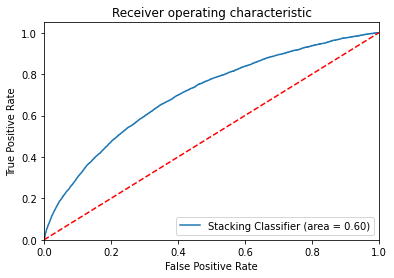

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_ml, model_final.predict(X_test_ml))
fpr, tpr, thresholds = roc_curve(y_test_ml, model_final.predict_proba(X_test_ml)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Stacking Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [ ]:
# level0.append(('lr', LogisticRegression(C=100,penalty='l2', solver='liblinear')))
# level0.append(('cart', DecisionTreeClassifier(max_depth=7,criterion='entropy')))
# level0.append(('bayes', GaussianNB()))


# **LR**

In [49]:
# Logistic Regression (os = 0.5)
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=100,penalty='l2', solver='liblinear')

# Printing all the parameters of logistic regression
# print(clf)

  # Creating the model on Training Data
LOG_final=clf.fit(X_train_mlos,y_train_mlos)
prediction_lr=LOG_final.predict(X_test_ml)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_ml, prediction_lr))
print(metrics.confusion_matrix(y_test_ml, prediction_lr))

# Printing the Overall Accuracy of the model
F1_Score_lr=metrics.f1_score(y_test_ml, prediction_lr, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score_lr,2))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     84509
           1       0.21      0.31      0.25      7437

    accuracy                           0.85     91946
   macro avg       0.57      0.60      0.58     91946
weighted avg       0.88      0.85      0.86     91946

[[76030  8479]
 [ 5146  2291]]
Accuracy of the model on Testing Sample Data: 0.86


In [50]:
import joblib
joblib.dump(LOG_final, r'/gdrive/MyDrive/PGD_project/model_LR_final.pkl')

['/gdrive/MyDrive/PGD_project/model_LR_final.pkl']

In [51]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG_final, X_ml , y_ml, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



Accuracy values for 10-fold Cross Validation:
 [0.88047413 0.88045934 0.88037914 0.8804104  0.88050681 0.88034657
 0.8807101  0.88050296 0.8803753  0.88043778]

Final Average Accuracy of the model: 0.88


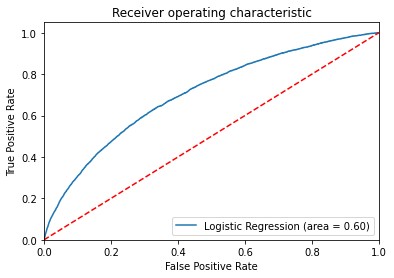

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_ml, LOG_final.predict(X_test_ml))
fpr, tpr, thresholds = roc_curve(y_test_ml, LOG_final.predict_proba(X_test_ml)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

Feature: 0, Score: -0.45167
Feature: 1, Score: -0.35364
Feature: 2, Score: 3.10978
Feature: 3, Score: 0.57184
Feature: 4, Score: -29.72513
Feature: 5, Score: 1.03517
Feature: 6, Score: -2.05912
Feature: 7, Score: 0.14874
Feature: 8, Score: -0.09017
Feature: 9, Score: 0.22994
Feature: 10, Score: 0.20511
Feature: 11, Score: -0.20019
Feature: 12, Score: 0.49890
Feature: 13, Score: 0.21030
Feature: 14, Score: 0.04750
Feature: 15, Score: -1.95146
Feature: 16, Score: 0.58732
Feature: 17, Score: -0.35581
Feature: 18, Score: -0.47945
Feature: 19, Score: 0.74448
Feature: 20, Score: 7.07886
Feature: 21, Score: -0.26690
Feature: 22, Score: 0.39882
Feature: 23, Score: -0.25771
Feature: 24, Score: 0.07051
Feature: 25, Score: 0.14998
Feature: 26, Score: 0.13301
Feature: 27, Score: 0.03638
Feature: 28, Score: 0.10928
Feature: 29, Score: 0.28366
Feature: 30, Score: 0.10528
Feature: 31, Score: 0.19317
Feature: 32, Score: 0.61287
Feature: 33, Score: 0.24317
Feature: 34, Score: 0.41111
Feature: 35, Score

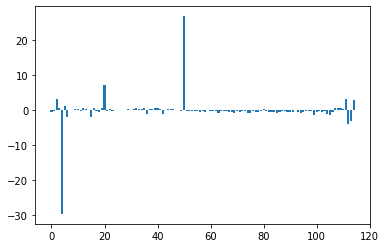

In [64]:
from matplotlib import pyplot
# get importance
importance = LOG_final.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [65]:
# print(np.std(X_ml, 0)*LOG_final.coef_)

In [58]:
prediction_lrall=LOG_final.predict(X_ml)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_ml, prediction_lrall))
print(metrics.confusion_matrix(y_ml, prediction_lrall))

# Printing the Overall Accuracy of the model
F1_Score_lrall=metrics.f1_score(y_ml, prediction_lrall, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score_lrall,2))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92    281697
           1       0.21      0.30      0.25     24789

    accuracy                           0.85    306486
   macro avg       0.57      0.60      0.58    306486
weighted avg       0.88      0.85      0.86    306486

[[253483  28214]
 [ 17229   7560]]
Accuracy of the model on Testing Sample Data: 0.86


# **Checking Logistic Regression with different ratio of oversampling**

In [17]:
# Logistic Regression (os = .4)
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=100,penalty='l2', solver='liblinear')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train_mlos,y_train_mlos)
prediction_lr=LOG.predict(X_test_ml)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_ml, prediction_lr))
print(metrics.confusion_matrix(y_test_ml, prediction_lr))

# Printing the Overall Accuracy of the model
F1_Score_lr=metrics.f1_score(y_test_ml, prediction_lr, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score_lr,2))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     84509
           1       0.24      0.22      0.23      7437

    accuracy                           0.88     91946
   macro avg       0.59      0.58      0.58     91946
weighted avg       0.88      0.88      0.88     91946

[[79389  5120]
 [ 5795  1642]]
Accuracy of the model on Testing Sample Data: 0.88


In [22]:
# Logistic Regression (os = 0.45)
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=100,penalty='l2', solver='liblinear')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train_mlos,y_train_mlos)
prediction_lr=LOG.predict(X_test_ml)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_ml, prediction_lr))
print(metrics.confusion_matrix(y_test_ml, prediction_lr))

# Printing the Overall Accuracy of the model
F1_Score_lr=metrics.f1_score(y_test_ml, prediction_lr, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score_lr,2))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     84509
           1       0.23      0.26      0.24      7437

    accuracy                           0.87     91946
   macro avg       0.58      0.59      0.59     91946
weighted avg       0.88      0.87      0.87     91946

[[77860  6649]
 [ 5482  1955]]
Accuracy of the model on Testing Sample Data: 0.87


In [27]:
# Logistic Regression (os = 0.475)
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=100,penalty='l2', solver='liblinear')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train_mlos,y_train_mlos)
prediction_lr=LOG.predict(X_test_ml)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_ml, prediction_lr))
print(metrics.confusion_matrix(y_test_ml, prediction_lr))

# Printing the Overall Accuracy of the model
F1_Score_lr=metrics.f1_score(y_test_ml, prediction_lr, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score_lr,2))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     84509
           1       0.22      0.29      0.25      7437

    accuracy                           0.86     91946
   macro avg       0.58      0.60      0.59     91946
weighted avg       0.88      0.86      0.87     91946

[[76943  7566]
 [ 5296  2141]]
Accuracy of the model on Testing Sample Data: 0.87


In [32]:
# Logistic Regression (os = 0.48)
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=100,penalty='l2', solver='liblinear')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train_mlos,y_train_mlos)
prediction_lr=LOG.predict(X_test_ml)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_ml, prediction_lr))
print(metrics.confusion_matrix(y_test_ml, prediction_lr))

# Printing the Overall Accuracy of the model
F1_Score_lr=metrics.f1_score(y_test_ml, prediction_lr, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score_lr,2))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     84509
           1       0.22      0.29      0.25      7437

    accuracy                           0.86     91946
   macro avg       0.58      0.60      0.59     91946
weighted avg       0.88      0.86      0.87     91946

[[76746  7763]
 [ 5272  2165]]
Accuracy of the model on Testing Sample Data: 0.87


In [38]:
# Logistic Regression (os = 0.49)
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=100,penalty='l2', solver='liblinear')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train_mlos,y_train_mlos)
prediction_lr=LOG.predict(X_test_ml)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_ml, prediction_lr))
print(metrics.confusion_matrix(y_test_ml, prediction_lr))

# Printing the Overall Accuracy of the model
F1_Score_lr=metrics.f1_score(y_test_ml, prediction_lr, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score_lr,2))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     84509
           1       0.22      0.30      0.25      7437

    accuracy                           0.85     91946
   macro avg       0.58      0.60      0.59     91946
weighted avg       0.88      0.85      0.87     91946

[[76380  8129]
 [ 5207  2230]]
Accuracy of the model on Testing Sample Data: 0.87
